# Test-retest study on UW data using asymmetry index
In this script I will do a test retest study on some FSPGR and MPRAGE MRI sequencings. I follow the proccess from a matlab code, written by Ali Deatsch.

FSPGR all are cancer patients, MPRAGE are all healthy. Both are NC.

In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import itertools

In [2]:
from test_retest_functions import *

In [3]:
fspgrPath = '../../UW_data/Test-retest_UWCCC_MRI_AxT1_FSPGRbravo_refined/'
mpragePath = '../../UW_data/Test-retest_NITRCKirby_MRI_T1_MPRAGE/'

maskPath = 'C:/Users/Crt/Documents/WIMR/asymmetryAD/UW_data/AAL3+pons/'

## Dataset analysis
Firstly I will take a look at my dataset: number of subjects, number of longitudinal scans, median time between scans...

In [4]:
fspgr_patient_scans = count_patients_scan(fspgrPath, mpragePath)[0]
mprage_patient_scans = count_patients_scan(fspgrPath, mpragePath)[1]

In [5]:
print(f"Number of different patients with FSPGR scan: {len(fspgr_patient_scans)}\n")

for patient_id, scan_count in fspgr_patient_scans.items():
    print(f"Patient ID: {patient_id} - Number of scans: {scan_count}")

print('--------------------------------------------------------------')

print(f"Number of different patients with MPRAGE scan: {len(mprage_patient_scans)}\n")

for patient_id, scan_count in mprage_patient_scans.items():
    print(f"Patient ID: {patient_id} - Number of scans: {scan_count}")

Number of different patients with FSPGR scan: 16

Patient ID: GJDGYD - Number of scans: 2
Patient ID: GJDGYR - Number of scans: 2
Patient ID: GJDGYZ - Number of scans: 2
Patient ID: GJDGZH - Number of scans: 3
Patient ID: GJDGZW - Number of scans: 2
Patient ID: GJDH1X - Number of scans: 2
Patient ID: GJDH22 - Number of scans: 2
Patient ID: GJDH2A - Number of scans: 2
Patient ID: GJDH2Z - Number of scans: 2
Patient ID: GJDH4C - Number of scans: 2
Patient ID: GJDH4Q - Number of scans: 2
Patient ID: GJDHDK - Number of scans: 2
Patient ID: GJDHVO - Number of scans: 3
Patient ID: GJDHZ6 - Number of scans: 2
Patient ID: GJDHZF - Number of scans: 2
Patient ID: GJDI07 - Number of scans: 2
--------------------------------------------------------------
Number of different patients with MPRAGE scan: 21

Patient ID: S113 - Number of scans: 2
Patient ID: S127 - Number of scans: 2
Patient ID: S142 - Number of scans: 2
Patient ID: S239 - Number of scans: 2
Patient ID: S346 - Number of scans: 2
Patien

For now I'm only interested in those with 2 scan. I will filter out the dictionary to contain only those. 

In [6]:
fspgr_patient_scans = {patient_id: scans for patient_id, scans in fspgr_patient_scans.items() if scans == 2}

In [7]:
print(f"Number of different patients: {len(fspgr_patient_scans)}\n")

for patient_id, scan_count in fspgr_patient_scans.items():
    print(f"Patient ID: {patient_id} - Number of scans: {scan_count}")

Number of different patients: 14

Patient ID: GJDGYD - Number of scans: 2
Patient ID: GJDGYR - Number of scans: 2
Patient ID: GJDGYZ - Number of scans: 2
Patient ID: GJDGZW - Number of scans: 2
Patient ID: GJDH1X - Number of scans: 2
Patient ID: GJDH22 - Number of scans: 2
Patient ID: GJDH2A - Number of scans: 2
Patient ID: GJDH2Z - Number of scans: 2
Patient ID: GJDH4C - Number of scans: 2
Patient ID: GJDH4Q - Number of scans: 2
Patient ID: GJDHDK - Number of scans: 2
Patient ID: GJDHZ6 - Number of scans: 2
Patient ID: GJDHZF - Number of scans: 2
Patient ID: GJDI07 - Number of scans: 2


Now I want to calculate the median, max and min time between two scans. 

In [8]:
fspgr_scan_dates = date_of_scans(fspgrPath, fspgr_patient_scans)

In [9]:
for patient_id, dates in fspgr_scan_dates.items():
    print(f"Patient {patient_id} has scan dates: {dates}")

Patient GJDGYD has scan dates: ['2012-06-17', '2012-06-29']
Patient GJDGYR has scan dates: ['2019-05-11', '2019-05-15']
Patient GJDGYZ has scan dates: ['2014-11-13', '2014-11-29']
Patient GJDGZW has scan dates: ['2013-03-20', '2013-03-26']
Patient GJDH1X has scan dates: ['2017-05-14', '2017-05-23']
Patient GJDH22 has scan dates: ['2011-02-21', '2011-02-26']
Patient GJDH2A has scan dates: ['2015-09-28', '2015-10-03']
Patient GJDH2Z has scan dates: ['2019-05-14', '2019-05-22']
Patient GJDH4C has scan dates: ['2016-07-10', '2016-07-17']
Patient GJDH4Q has scan dates: ['2015-02-28', '2015-03-09']
Patient GJDHDK has scan dates: ['2016-09-15', '2016-10-03']
Patient GJDHZ6 has scan dates: ['2019-08-19', '2019-09-16']
Patient GJDHZF has scan dates: ['2019-06-11', '2019-07-01']
Patient GJDI07 has scan dates: ['2019-11-09', '2019-11-16']


Finally calculating the time differences.

In [10]:
fspgr_time_between_scans = []

for dates_array in fspgr_scan_dates.values():

    date0 = parser.parse(dates_array[0])
    date1 = parser.parse(dates_array[1])

    diff = date1 - date0

    fspgr_time_between_scans.append(diff.days)

In [11]:
print(fspgr_time_between_scans)

[12, 4, 16, 6, 9, 5, 5, 8, 7, 9, 18, 28, 20, 7]


In [12]:
fspgr_average = np.mean(fspgr_time_between_scans)
fspgr_medi = int(np.median(fspgr_time_between_scans))
fspgr_minimum = np.min(fspgr_time_between_scans)
fspgr_maximum = np.max(fspgr_time_between_scans)

In [13]:
print(f'''Average time between two scans: {fspgr_average} days
Median time between two scans: {fspgr_medi} days
Range: {fspgr_minimum}-{fspgr_maximum} days''')

Average time between two scans: 11.0 days
Median time between two scans: 8 days
Range: 4-28 days


!! MPRAGE scans were all taken on the same day. !!

## Asymmetry index for whole brain region

Getting the file paths of those patients with 2 scans. 

In [14]:
fspgr_files = filepaths(fspgrPath, mpragePath, fspgr_patient_scans)[0]
mprage_files = filepaths(fspgrPath, mpragePath, mprage_patient_scans)[1]

Separating initial scans from follow up scans. 

In [15]:
first_fspgr = separate_scans(fspgr_files)[0]
second_fspgr = separate_scans(fspgr_files)[1]

first_mprage = separate_scans(mprage_files)[0]
second_mprage = separate_scans(mprage_files)[1]

Flattening and normalizing the scans.

In [16]:
first_fspgr = flatten_and_normalize(first_fspgr)
second_fspgr = flatten_and_normalize(second_fspgr)

first_mprage = flatten_and_normalize(first_mprage)
second_mprage = flatten_and_normalize(second_mprage)

In [17]:
print(first_fspgr.shape)

(902629, 14)


Getting the mask by hemispheres.

In [18]:
left_hemisphere_mask = mask_hemispheres(maskPath + 'AAL3+pons.nii', maskPath + 'AAL3+pons.txt')[0]
right_hemisphere_mask = mask_hemispheres(maskPath + 'AAL3+pons.nii', maskPath + 'AAL3+pons.txt')[1]

In [19]:
print(left_hemisphere_mask.shape)

(902629,)


Calculating AI for each .nii image.

In [20]:
AI_first_fspgr = AI_whole_brain(first_fspgr, left_hemisphere_mask, right_hemisphere_mask)
AI_second_fspgr = AI_whole_brain(second_fspgr, left_hemisphere_mask, right_hemisphere_mask)

AI_first_mprage = AI_whole_brain(first_mprage, left_hemisphere_mask, right_hemisphere_mask)
AI_second_mprage = AI_whole_brain(second_mprage, left_hemisphere_mask, right_hemisphere_mask)

In [21]:
print(AI_first_fspgr)
print(AI_second_fspgr)

print(AI_first_mprage)
print(AI_second_mprage)

[2.2716263927847233, 0.6981483393574507, 1.5267775845506135, 2.9738967031562797, 3.272500962817745, 1.295742922673181, 1.9702735941063039, 1.4520470305594388, 0.9987019273520794, 0.25406414619746104, 1.3196926020521467, 1.9114601689805506, 3.212167095725266, 6.0418867726467775]
[3.826913710967663, 1.9910826824705143, 2.8578888601996524, 0.5110487835850963, 2.9355718625141916, 0.3800589959438584, 1.3552831099278029, 4.80975660195253, -0.7016924234863731, 0.11882976587131301, 3.0631221911805273, 1.1034943544087157, 0.990187743482684, 3.694288144271703]
[0.11655767508083116, 0.824749414396857, 0.6811162363994079, 0.14840366310001885, 0.09821134705510988, 0.15812106473042425, 0.15399222410245897, 2.319267055191121, 0.3160683594910864, 1.1374855117482152, 0.1001943889645143, -12.176784052287395, 62.69959454181071, 0.011605094036920165, 0.11992573582342435, 1.9511565597093414, 0.08963503987800497, 0.14106486649416675, 0.9729728940694166, 0.03157317834853516, 0.13441699812686553]
[2.113455413

Using the test-retest functions in functions script to calculate different stuff.

Relative difference (RD)

In [22]:
RD_fspgr = calculate_RD(AI_first_fspgr, AI_second_fspgr)
RD_mprage = calculate_RD(AI_first_mprage, AI_second_mprage)

In [23]:
print(RD_fspgr)
print(RD_mprage)

[51.00523376819259, 96.15643524997049, 60.716649369886284, -141.34212021055674, -10.854547289739257, -109.28307415771353, -36.98571631224807, 107.24416696683032, -1145.0100610970956, -72.53236159093224, 79.55752964146873, -53.597214041129796, -105.74924951655798, -48.22424922328931]
[179.09291641835782, 94.35230762738894, 60.749926829158476, 201.0562803890338, 14.12629434577995, 12.350484523607633, 202.09483594018673, 12.475397774593896, -45.69675671683023, 6.070499124151396, 16.89002261442667, 749.1955576999313, -199.42469934991578, 68.99772195303188, 12.995953235902201, 10.53850555725997, -22.67013452071806, -39.27273862041374, 43.78573013182002, -103.30362484492296, -17.438811621958248]


Plotting average CV as box plots.

In [37]:
average_RD_fspgr = np.mean(RD_fspgr)
average_RD_mprage = np.mean(RD_mprage)

std_RD_fspgr = np.std(RD_fspgr)
std_RD_mprage = np.std(RD_mprage)

max_RD_fspgr = np.amax(RD_fspgr)
min_RD_fspgr = np.amin(RD_fspgr)
max_RD_mprage = np.amax(RD_mprage)
min_RD_mprage = np.amin(RD_mprage)

In [38]:
average_RDs = [average_RD_fspgr, average_RD_mprage]
std_devs = [std_RD_fspgr, std_RD_mprage]
min_values = [min_RD_fspgr, min_RD_mprage]
max_values = [max_RD_fspgr, max_RD_mprage]

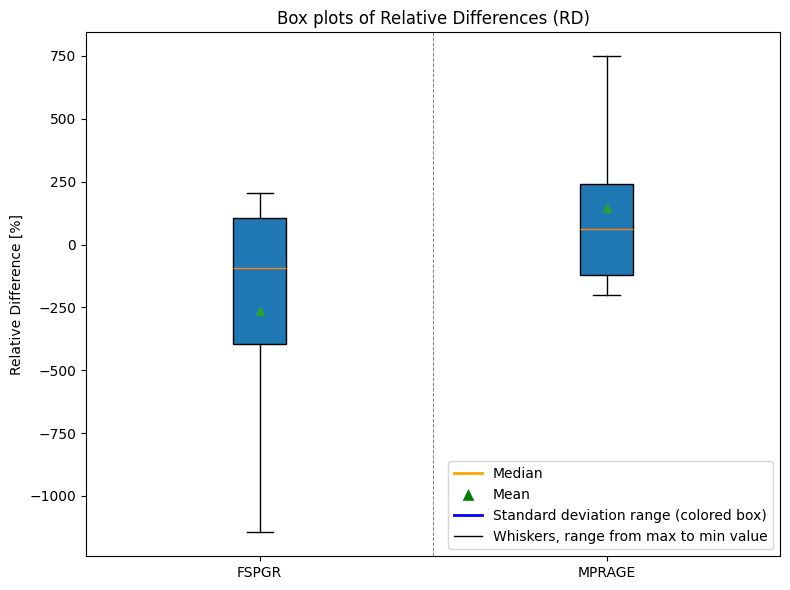

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))

# Construct data for the boxplot
data = [
    [min_values[0], average_RDs[0] - std_devs[0], average_RDs[0], average_RDs[0] + std_devs[0], max_values[0]],
    [min_values[1], average_RDs[1] - std_devs[1], average_RDs[1], average_RDs[1] + std_devs[1], max_values[1]]
]
# Plotting the box plot
ax.boxplot(data, vert=True, patch_artist=True, showmeans=True, 
           flierprops=dict(marker='o', color='gray', alpha=0.5))

# Customizing the plot
ax.set_title('Box plots of Relative Differences (RD)')
ax.set_ylabel('Relative Difference [%]')
ax.set_xticklabels(['FSPGR', 'MPRAGE'])  # Customize labels as needed
ax.axvline(x=1.5, color='gray', linestyle='--', linewidth=0.7)  # Vertical line to separate groups

legend_elements = [
    plt.Line2D([0], [0], color='orange', lw=2, label='Median'),
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Mean'),
    plt.Line2D([0], [0], color='blue', lw=2, label='Interquartile Range (colored box)'),
    plt.Line2D([0], [0], color='black', lw=1, label='Whiskers, range from max to min value'),
]

ax.legend(handles=legend_elements, loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()

Coefficient of variation (CV) <br> Relative measure of dispersion within replicates.

In [24]:
CV_fspgr = calculate_CV(AI_first_fspgr, AI_second_fspgr)
CV_mprage = calculate_CV(AI_first_mprage, AI_second_mprage)

In [28]:
print(CV_fspgr)
print(CV_mprage)

[25.502616884096295, 48.07821762498526, 30.358324684943142, 70.67106010527837, 5.427273644869628, 54.641537078856764, 18.492858156124036, 53.62208348341516, 572.5050305485478, 36.26618079546612, 39.77876482073437, 26.798607020564898, 52.87462475827899, 24.112124611644656]
[89.54645820917891, 47.17615381369447, 30.374963414579238, -100.5281401945169, 7.063147172889975, 6.175242261803817, -101.04741797009336, 6.237698887296948, 22.848378358415115, 3.035249562075698, 8.445011307213335, 374.59777884996566, 99.71234967495788, 34.49886097651594, 6.4979766179511005, 5.269252778629985, 11.33506726035903, 19.63636931020687, 21.89286506591001, 51.65181242246148, 8.719405810979124]


Intraclass Correlation Coefficient (ICC) <br>
Describes how strongly units in the same group resemble each other. 
Ratio of variance between subject measurements to the total variance.


In [29]:
ICC_fspgr = calculate_ICC(AI_first_fspgr, AI_second_fspgr)
ICC_mprage = calculate_ICC(AI_first_mprage, AI_second_mprage)

In [30]:
print(ICC_fspgr)
print(ICC_mprage)

[0.7109926231861114, 0.7806916967211392, 0.7705646313200891, 0.495223569589485, 0.9812805617328976, 0.8765003199057431, 0.940241617481393, 0.3454754085841982, 0.6730054776216903, 0.9969361735790273, 0.6619110235287553, 0.9011440604199826, 0.5465482297852499, 0.5191767259650336]
[0.9897827665425413, 0.9944135251690644, 0.9990865432277997, 0.10796301302530001, 0.9999994231200524, 0.9999988785140426, 0.3043830199405791, 0.9997535501598225, 0.9999642183649157, 0.9999868722935058, 0.999999115567624, 0.2592542277389788, 0.0897061683700334, 0.9999996131427514, 0.9999992807489383, 0.9998780479287406, 0.9999991376545446, 0.9999944489771235, 0.9992304573374611, 0.9999988025599601, 0.9999987966020343]


Plotting ICC vs CV.

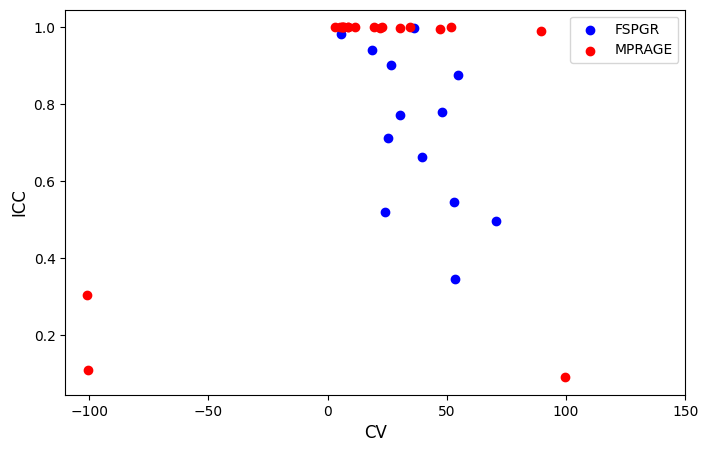

In [34]:
plt.figure(figsize=(8, 5))
plt.scatter(CV_fspgr, ICC_fspgr, color='b', label='FSPGR')
plt.scatter(CV_mprage, ICC_mprage, color='r', label='MPRAGE')
plt.xlabel('CV', fontsize=12)
plt.ylabel('ICC', fontsize=12)
plt.xlim(-110, 150)
plt.legend()
plt.show()